<a href="https://colab.research.google.com/github/Jacobbaum19/Data-Science-Projects/blob/main/Jacob__Baum_Programming_Languages_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Statements

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [94]:
# Query for all of StackExchange on 5/9/24
df = pd.read_csv("QueryResultsNew.csv", names=["Date", "Language", "Count"], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [95]:
# First 5 rows
df.head(5)

,Date,Language,Count
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,ruby,70
2,2008-08-01 00:00:00,perl,28
3,2008-08-01 00:00:00,python,119
4,2008-08-01 00:00:00,delphi,13


In [96]:
df.tail(5)

,Date,Language,Count
2616,2024-04-01 00:00:00,go,363
2617,2024-04-01 00:00:00,r,1657
2618,2024-04-01 00:00:00,delphi,112
2619,2024-04-01 00:00:00,php,1487
2620,2024-04-01 00:00:00,ruby,124


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [97]:
# Check size of the dataframe
df.shape

(2621, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [98]:
number_of_entries = df.count()
print(number_of_entries)

Date        2621
Language    2621
Count       2621
dtype: int64


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [99]:
# Sum each group of programming languages in the Language column.
count_per_language = df.groupby("Language").sum()
print(count_per_language)

                                                         Date    Count
Language                                                              
assembly    2008-08-01 00:00:002008-09-01 00:00:002008-10-...    44357
c           2008-08-01 00:00:002008-09-01 00:00:002008-10-...   404310
c#          2008-07-01 00:00:002008-08-01 00:00:002008-09-...  1616186
c++         2008-08-01 00:00:002008-09-01 00:00:002008-10-...   807228
delphi      2008-08-01 00:00:002008-09-01 00:00:002008-10-...    51918
go          2009-11-01 00:00:002009-12-01 00:00:002010-01-...    72990
java        2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1917704
javascript  2008-08-01 00:00:002008-09-01 00:00:002008-10-...  2529059
perl        2008-08-01 00:00:002008-09-01 00:00:002008-10-...    68109
php         2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1464810
python      2008-08-01 00:00:002008-09-01 00:00:002008-10-...  2194524
r           2008-09-01 00:00:002008-11-01 00:00:002008-12-...   506190
ruby  

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [100]:
# Make a new column called # of months
number_of_months = df.groupby("Language").count()
print(number_of_months)


            Date  Count
Language               
assembly     189    189
c            189    189
c#           190    190
c++          189    189
delphi       189    189
go           174    174
java         189    189
javascript   189    189
perl         189    189
php          189    189
python       189    189
r            187    187
ruby         189    189
swift        180    180


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [101]:
# Looking at an entry in the date column
df["Date"][1]

# Checking the type of the date
type(df["Date"][1])

# Convert it to a datetime object
test = pd.to_datetime(df["Date"][1])
type(test)


pandas._libs.tslibs.timestamps.Timestamp

In [102]:
# Converting the whole Date column to a datetime object

df["Date"] = pd.to_datetime(df["Date"])
print(df.head(5))

        Date Language  Count
0 2008-07-01       c#      3
1 2008-08-01     ruby     70
2 2008-08-01     perl     28
3 2008-08-01   python    119
4 2008-08-01   delphi     13


## Data Manipulation



In [103]:
# Formatting a new df where we switch axis basically and language and date is now the columns and the rows show the # of posts
# that month.
reshaped_df = df.pivot(index="Date", columns="Language", values="Count")
print(reshaped_df.head(5))

Language    assembly      c       c#    c++  delphi  go     java  javascript  \
Date                                                                           
2008-07-01       NaN    NaN     3.00    NaN     NaN NaN      NaN         NaN   
2008-08-01      8.00  83.00   503.00 164.00   13.00 NaN   222.00      163.00   
2008-09-01     28.00 320.00 1,639.00 755.00  104.00 NaN 1,129.00      634.00   
2008-10-01     16.00 303.00 1,987.00 807.00  112.00 NaN 1,148.00      722.00   
2008-11-01     16.00 258.00 1,729.00 734.00  140.00 NaN   954.00      580.00   

Language     perl    php  python    r   ruby  swift  
Date                                                 
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01  28.00 157.00  119.00  NaN  70.00    NaN  
2008-09-01 130.00 474.00  537.00 6.00 286.00    NaN  
2008-10-01 128.00 604.00  506.00  NaN 247.00    NaN  
2008-11-01  97.00 497.00  448.00 1.00 157.00    NaN  


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [104]:
# Dimensions of new dataframe
reshaped_df.shape

(190, 14)

In [105]:
# Number of rows and columns
print(f"Number of Rows: {reshaped_df.shape[0]}")
print(f"Number of Columns: {reshaped_df.shape[1]}")

Number of Rows: 190
Number of Columns: 14


In [106]:
# Printing out column names
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Language')

In [107]:
# First first rows of the new df
reshaped_df.head(5)

Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.00,83.00,503.00,164.00,13.00,NaN,222.00,163.00,28.00,157.00,119.00,NaN,70.00,NaN
2008-09-01,28.00,320.00,"1,639.00",755.00,104.00,NaN,"1,129.00",634.00,130.00,474.00,537.00,6.00,286.00,NaN
2008-10-01,16.00,303.00,"1,987.00",807.00,112.00,NaN,"1,148.00",722.00,128.00,604.00,506.00,NaN,247.00,NaN
2008-11-01,16.00,258.00,"1,729.00",734.00,140.00,NaN,954.00,580.00,97.00,497.00,448.00,1.00,157.00,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [130]:
reshaped_df.count()
 # The number of entries vary because some of the NA values were replaced.

Language
assembly      190
c             190
c#            190
c++           190
delphi        190
go            190
java          190
javascript    190
perl          190
php           190
python        190
r             190
ruby          190
swift         190
dtype: int64

In [109]:
# To fix this we'll subsuite the NA values with 0's.
reshaped_df.fillna(0, inplace=True)
reshaped_df.head(5)

# Checking the count again...
reshaped_df.count()

# Checking for NA's just in case they found a sercret home!
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

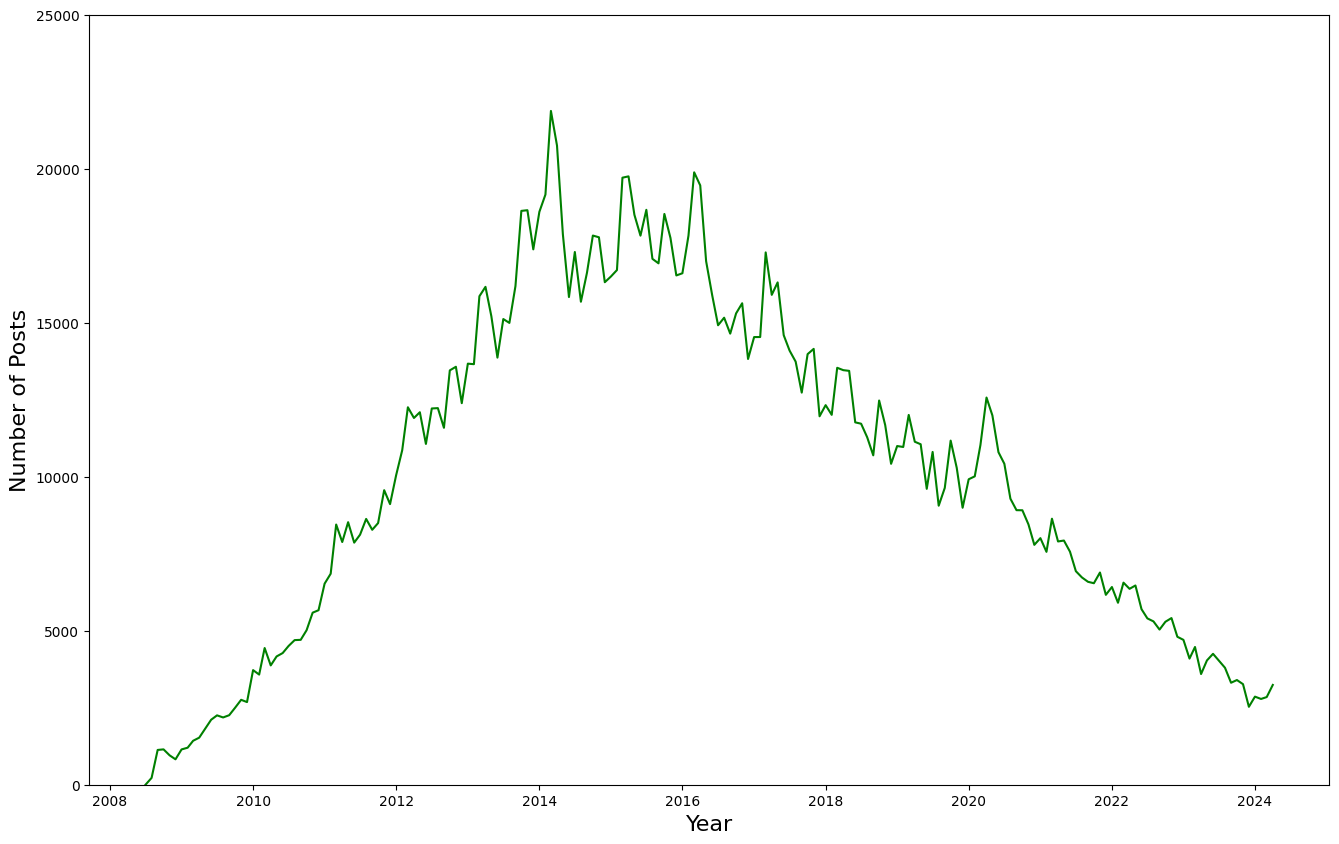

In [127]:
plt.figure(figsize=(16,10))
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of Posts", fontsize=16)
plt.ylim(0,25000)
java_plot = plt.plot(reshaped_df.index, reshaped_df["java"], color="green")

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

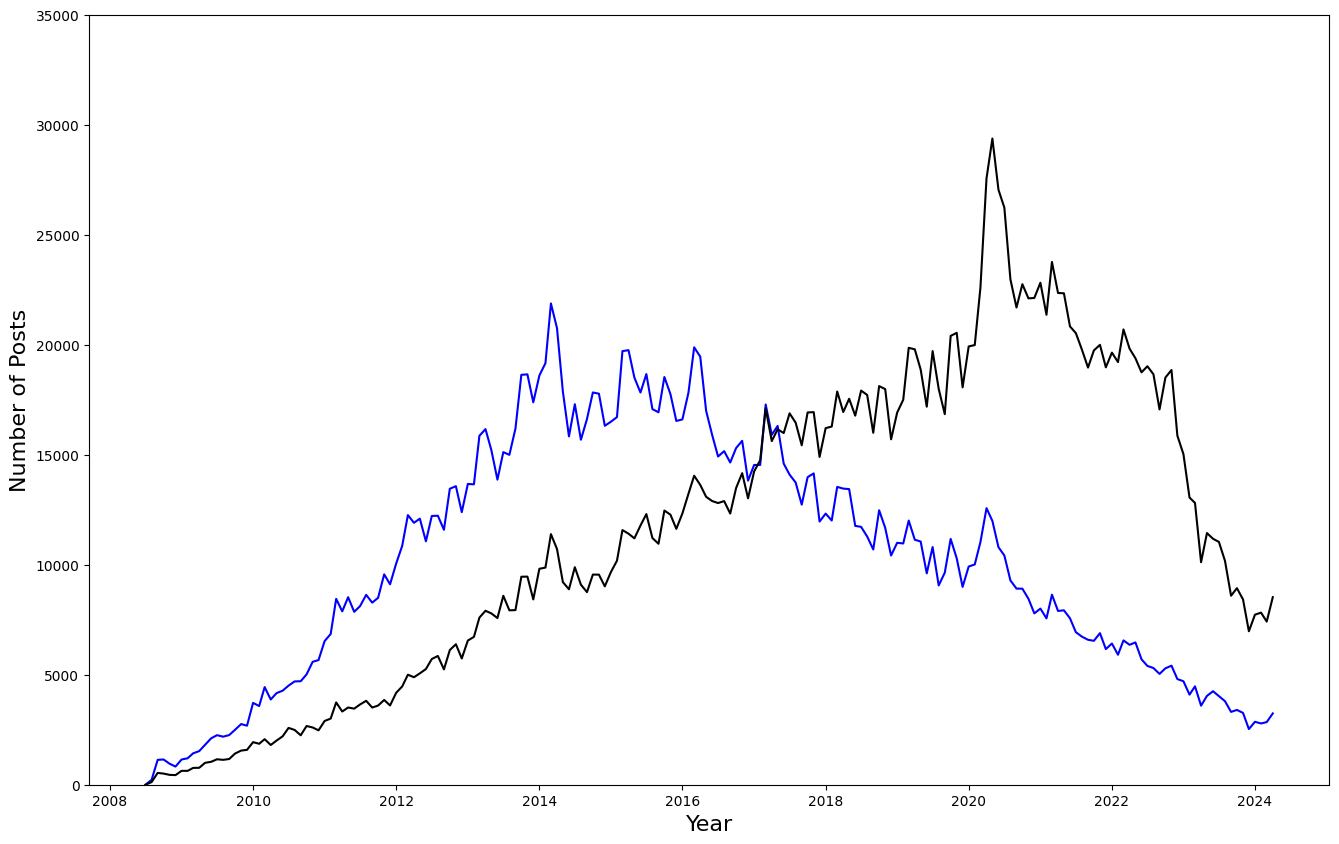

In [142]:

plt.figure(figsize=(16,10))
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of Posts", fontsize=16)
plt.ylim(0,35000)
java_plot = plt.plot(reshaped_df.index, reshaped_df["java"], color="blue")
python_plot = plt.plot(reshaped_df.index, reshaped_df["python"], color="black")

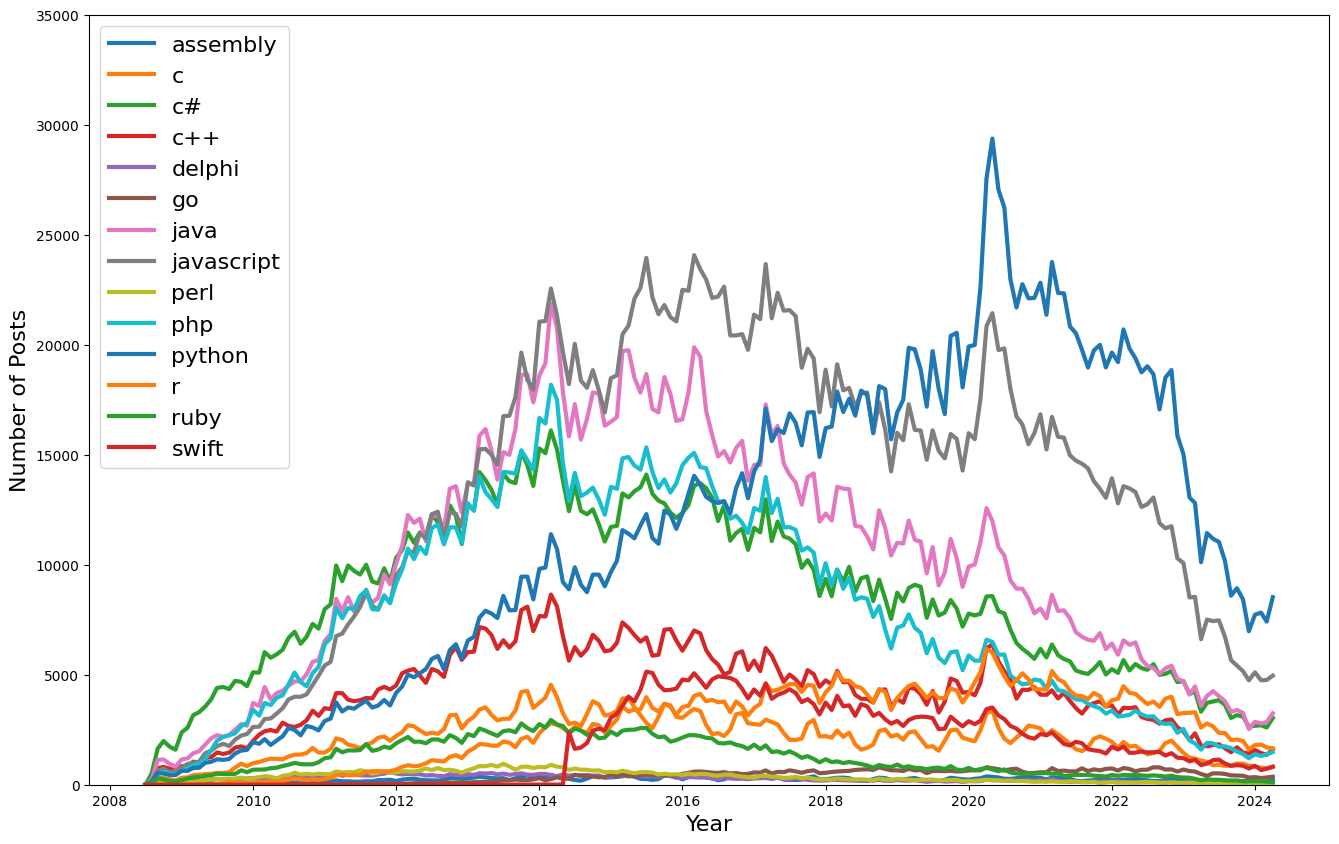

In [140]:
plt.figure(figsize=(16,10))
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of Posts", fontsize=16)
plt.ylim(0,35000)

# Plotting all languages

for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column],
           linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

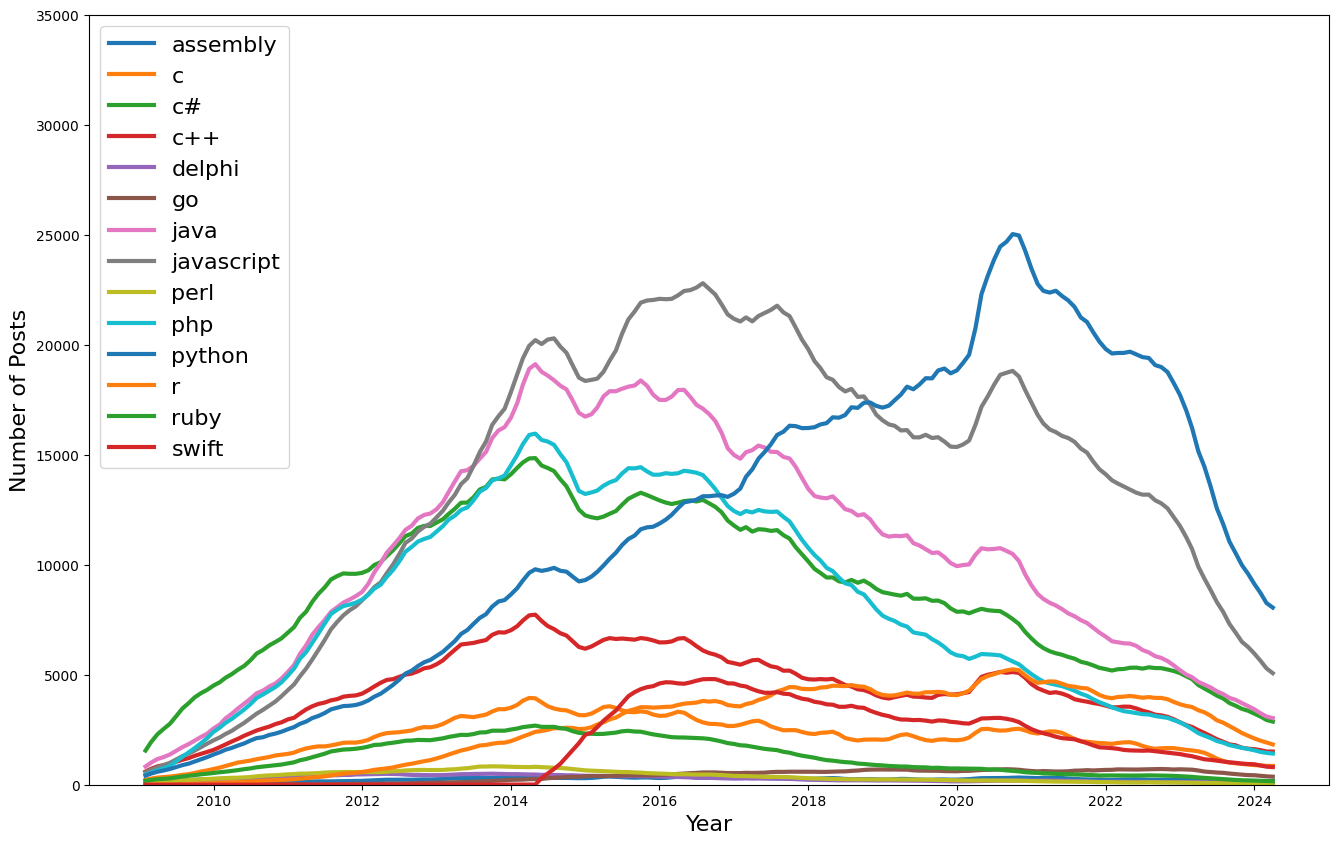

In [146]:
# Rolling window calculation for 8 days. (8 day moving average)
roll_df = reshaped_df.rolling(window=8).mean()

plt.figure(figsize=(16,10))
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of Posts", fontsize=16)
plt.ylim(0,35000)

# Plotting all languages

for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column],
           linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)